# Neural Networks

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## checking if gpu is used

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## benchmark

In [4]:
%%time
import tensorflow as tf
import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label
batch_size = 128
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#   tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
model.fit(
    ds_train,
    epochs=12,
    validation_data=ds_test,
)

TensorFlow version: 2.16.2
Num GPUs Available:  1
Cause: Unable to locate the source code of <function normalize_img at 0x3048cfd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2025-05-06 18:41:26.268926: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-06 18:41:26.269072: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-06 18:41:26.269080: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-06 18:41:26.269439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-06 18:41:26.269460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Cause: Unable to locate the source code of <function normalize_img at 0x3048cfd80>. Note that functions defined in certain environments, like the interactive Python shell, do not exp

Cause: Unable to locate the source code of <function normalize_img at 0x3048cfd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/12


2025-05-06 18:41:26.857085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 10/469 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3822 - loss: 1.8688

KeyboardInterrupt: 

## TensorFlow Basics

In [5]:
tf.constant('Hello World')

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [6]:
tf.constant(5)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [7]:
hello = tf.constant('Hello World')
x =  tf.constant(5)

In [8]:
print(f'{type(x)} \n {type(hello)}')

<class 'tensorflow.python.framework.ops.EagerTensor'> 
 <class 'tensorflow.python.framework.ops.EagerTensor'>


## deprecated
tf.session --> no need for sessions
tf.placeholder --> tf.Variables

In [10]:
x = tf.Variable(initial_value=0, dtype=tf.int32, name='x')
y = tf.Variable(initial_value=0, dtype=tf.int32, name='y')


In [11]:
tf.add(x,y)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [12]:
# Create and initialize TensorFlow Variables
x = tf.Variable(initial_value=5, dtype=tf.int32, name='x')
y = tf.Variable(initial_value=10, dtype=tf.int32, name='y')

print(f"Initial x: {x.numpy()}")
print(f"Initial y: {y.numpy()}")

# Perform the first addition
sum_result_1 = tf.add(x, y)
print(f"Sum (initial): {sum_result_1.numpy()}")

# Update the value of x
x.assign(20)
print(f"Updated x: {x.numpy()}")

# Update the value of y using assign_add
y.assign_add(5)
print(f"Updated y: {y.numpy()}")

# Perform the addition again with the updated values
sum_result_2 = tf.add(x, y)
print(f"Sum (updated): {sum_result_2.numpy()}")

Initial x: 5
Initial y: 10
Sum (initial): 15
Updated x: 20
Updated y: 15
Sum (updated): 35


In [13]:
# Define some tf.Tensor values
value_x = tf.constant(15, dtype=tf.int32)
value_y = tf.constant(25, dtype=tf.int32)

# Create tf.Variable (if you need to store and potentially update a state)
z = tf.Variable(initial_value=0, dtype=tf.int32)

# Perform operations using the tf.Tensor values
sum_val = tf.add(value_x, value_y)
print(f"Sum of tensors: {sum_val.numpy()}")

# Update the tf.Variable with the result
z.assign(sum_val)
print(f"Value of z after assignment: {z.numpy()}")

Sum of tensors: 40
Value of z after assignment: 40


## MNIST Multi-layer Perceptron

In [ ]:
# This is the correct way in TensorFlow 2.x
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Now you have your training and testing data as NumPy arrays
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 23s 2us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)


In [26]:
train_labels.shape[0]

60000

In [16]:
sample = train_images[2]

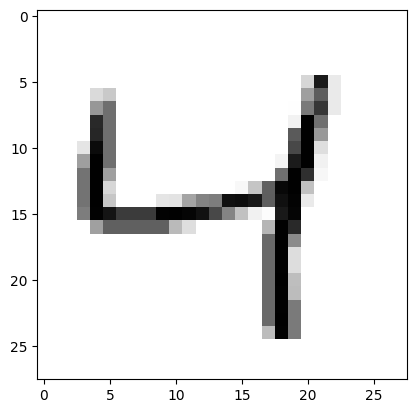

In [19]:
plt.imshow(sample, cmap='Greys')

## Parameters

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [27]:
n_classes = 10
n_samples = train_images.shape[0]

In [28]:
n_input = train_images.shape[1]*train_images.shape[2]

In [29]:
n_hidden_1 = 256
n_hidden_2 = 256

In [30]:
def multilayer_perceptron(x, weights, biases):
    """
    A multilayer perceptron (MLP) model.

    This function defines a simple MLP with two hidden layers and an output layer.
    It applies affine transformations (matrix multiplication and bias addition)
    followed by ReLU activation for the hidden layers and a final affine
    transformation for the output layer.

    Args:
        x: A TensorFlow tensor of shape (batch_size, n_input) representing the input data.
        weights: A dictionary containing TensorFlow variables for the weights of each layer.
        It should have keys 'h1' (for the first hidden layer), 'h2' (for the second
        hidden layer), and 'out' (for the output layer). The shapes should be:
            - weights['h1']: (n_input, n_hidden_1)
            - weights['h2']: (n_hidden_1, n_hidden_2)
            - weights['out']: (n_hidden_2, n_classes)
        biases: A dictionary containing TensorFlow variables for the biases of each layer.
        It should have keys 'b1' (for the first hidden layer), 'b2' (for the second
    hidden layer), and 'out' (for the output layer). The shapes should be:
        - biases['b1']: (n_hidden_1,)
        - biases['b2']: (n_hidden_2,)
        - biases['out']: (n_classes,)

    Returns:
    A TensorFlow tensor of shape (batch_size, n_classes) representing the output
    of the MLP.
    """
    # Hidden fully connected layer 1 with ReLU activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Relu(X * W + B)
    layer_1 = tf.nn.relu(layer_1)

    # Hidden fully connected layer 2 with ReLU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output fully connected layer with no activation (or you might use softmax later)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

    return out_layer

In [32]:
weights = {
    'h1':tf.Variable(initial_value=tf.random.normal([n_input, n_hidden_1])),
    'h2':tf.Variable(initial_value=tf.random.normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(initial_value=tf.random.normal([n_hidden_2, n_classes]))
    }

In [34]:
print("Weights for hidden layer 1:", weights['h1'].shape)
print("Weights for hidden layer 2:", weights['h2'].shape)
print("Weights for output layer:", weights['out'].shape)

Weights for hidden layer 1: (784, 256)
Weights for hidden layer 2: (256, 256)
Weights for output layer: (256, 10)


In [37]:
biases = {
    'b1':tf.Variable(initial_value=tf.random.normal([n_hidden_1])),
    'b2':tf.Variable(initial_value=tf.random.normal([n_hidden_2])),
    'out':tf.Variable(initial_value=tf.random.normal([n_classes]))
    }

In [43]:
train_images_flat = train_images.reshape(-1, n_input).astype('float32') / 255.0
x = tf.constant(train_images_flat[:batch_size])
y = tf.one_hot(train_labels, depth=n_classes)


In [44]:
pred = multilayer_perceptron(x, weights, biases)

In [45]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

2025-05-06 20:29:34.721288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: logits and labels must be broadcastable: logits_size=[60000,10] labels_size=[128,10]


InvalidArgumentError: {{function_node __wrapped__SoftmaxCrossEntropyWithLogits_device_/job:localhost/replica:0/task:0/device:GPU:0}} logits and labels must be broadcastable: logits_size=[60000,10] labels_size=[128,10] [Op:SoftmaxCrossEntropyWithLogits] name: 

# The course is based on TensorFlow 1X which is depricated.
## Another practice will be added with TensorFlow 2X